# Assignment 2 Data visualization

## Reference
* [Assignment 1](https://nt246.github.io/NTRES-6100-data-science/lab5-titanic.html)
* [Assignment 2](https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html)
* [Assignment 3](https://walker-data.com/geog30323/08-data-visualization.html)

titanic.csv

# Prerequisite
- matplotlib
- pandas
- numpy


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/workspaces/DataScience_Bootcamp/helperFiles/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Question 1: According to Wikipedia, there was an estimated 2,224 passengers and crew onboard the Titanic when it sank. How many of them do we have information for in this dataset? Of the people we have data for, how many of them survived and how many did not? What is the overall survival rate?

 rows: 891 columns: 12


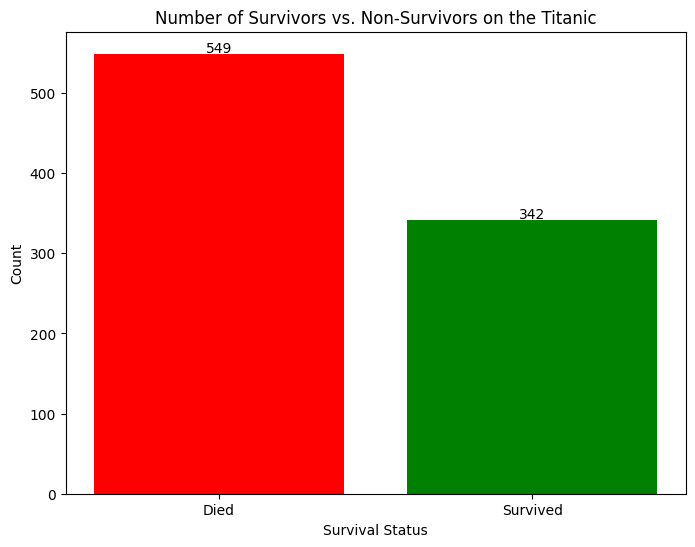

In [4]:
# How many of them do we have information for in this dataset?
rows, cols = df.shape 
print(f" rows: {rows} columns: {cols}")

# Of the people we have data for, how many of them survived and how many did not? What is the overall survival rate?
counts = df['Survived'].value_counts()

# Create the bar chart
# Map the numbers to more meaningful labels
labels = {0: 'Died', 1: 'Survived'}

# Create the plot
plt.figure(figsize=(8, 6))
plt.bar(counts.index.map(labels), counts.values, color=['red', 'green'])

for i, value in enumerate(counts):
    plt.text(i, value + 2, str(value), ha='center', va='baseline')

plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Number of Survivors vs. Non-Survivors on the Titanic')
plt.show()

Question 2. How many passengers on the Titanic were males and how many were females? What do you find when you break it down by ticket class?

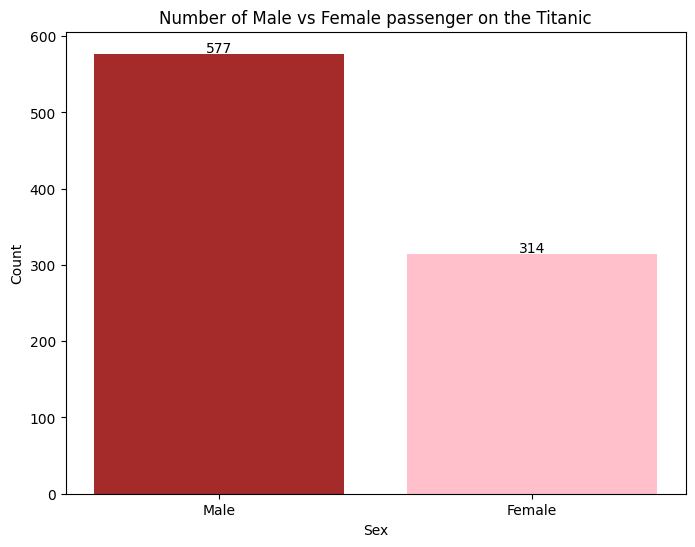

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


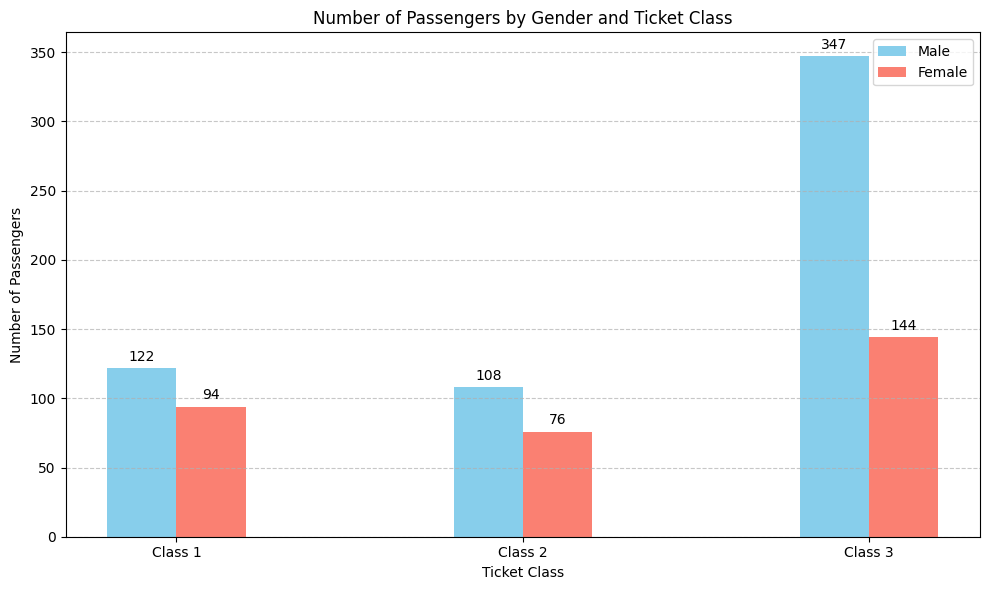

In [27]:
# How many passengers on the Titanic were males and how many were females?
counts = df["Sex"].value_counts()
Xlabels = {"male": 'Male', "female": 'Female'}

plt.figure(figsize=(8, 6))
plt.bar(counts.index.map(Xlabels), counts.values, color=['brown', 'pink'])

for i, value in enumerate(counts):
    plt.text(i, value + 2, str(value), ha='center', va='baseline')

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Number of Male vs Female passenger on the Titanic')
plt.show()

# What do you find when you break it down by ticket class?
data = df.groupby(['Pclass', 'Sex']).size().unstack(fill_value=0)
print(data)

classes = data.index
male_counts = data['male']
female_counts = data['female']

# Number of classes
num_classes = len(classes)

# Define the width of bars and the position of ticks
bar_width = 0.2
index = np.arange(num_classes)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for males and females
bar1 = ax.bar(index - bar_width / 2, male_counts, bar_width, label='Male', color='skyblue')
bar2 = ax.bar(index + bar_width / 2, female_counts, bar_width, label='Female', color='salmon')

# Add value annotations above the bars
def add_value_annotations(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_annotations(bar1)
add_value_annotations(bar2)

# Customize the plot
ax.set_title('Number of Passengers by Gender and Ticket Class')
ax.set_xlabel('Ticket Class')
ax.set_ylabel('Number of Passengers')
ax.set_xticks(index)
ax.set_xticklabels([f'Class {i}' for i in classes])
ax.legend()

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


Question 3. How many passengers of each sex survived and how many of them did not? What is the survival rate for passengers of each sex?

Sex       female  male
Survived              
0             81   468
1            233   109


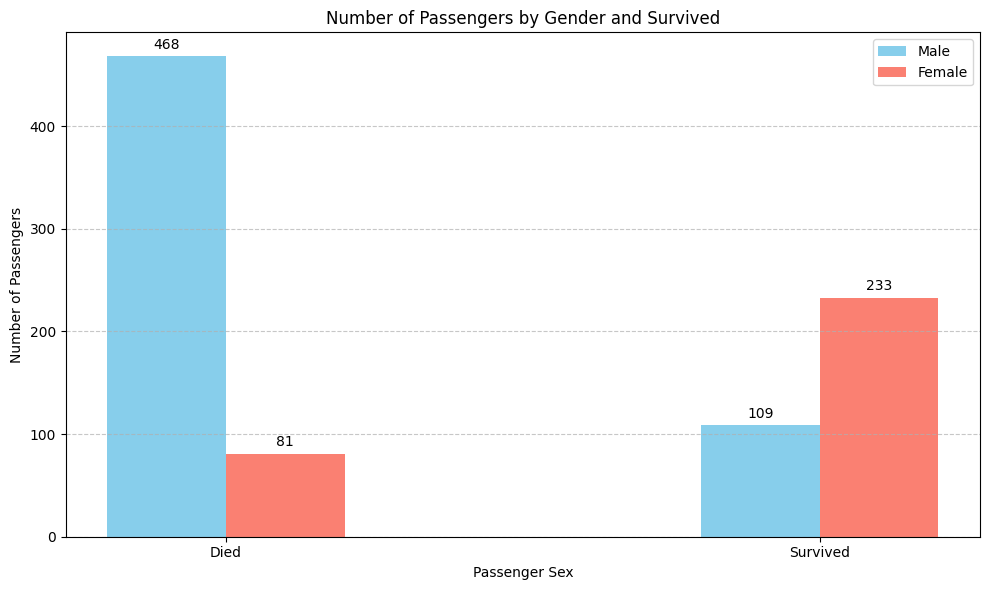

In [37]:
# How many of each sex survived ?
data = df.groupby(['Survived', 'Sex']).size().unstack(fill_value=0)
print(data)

classes = data.index
male_counts = data['male']
female_counts = data['female']
sex_Label = {0: "Died", 1: "Survived"}

# Number of classes
num_classes = len(classes)

# Define the width of bars and the position of ticks
bar_width = 0.2
index = np.arange(num_classes)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for males and females
bar1 = ax.bar(index - bar_width / 2, male_counts, bar_width, label='Male', color='skyblue')
bar2 = ax.bar(index + bar_width / 2, female_counts, bar_width, label='Female', color='salmon')

# Add value annotations above the bars
def add_value_annotations(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_annotations(bar1)
add_value_annotations(bar2)

# Customize the plot
ax.set_title('Number of Passengers by Gender and Survived')
ax.set_xlabel('Passenger Sex')
ax.set_ylabel('Number of Passengers')
ax.set_xticks(index)
ax.set_xticklabels([f'{sex_Label[i]}' for i in classes])
ax.legend()

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

Question 4. For how many passengers do we have age information (including estimated age)? For how many is the age information missing? What is the age distribution for passengers whose age information is available?

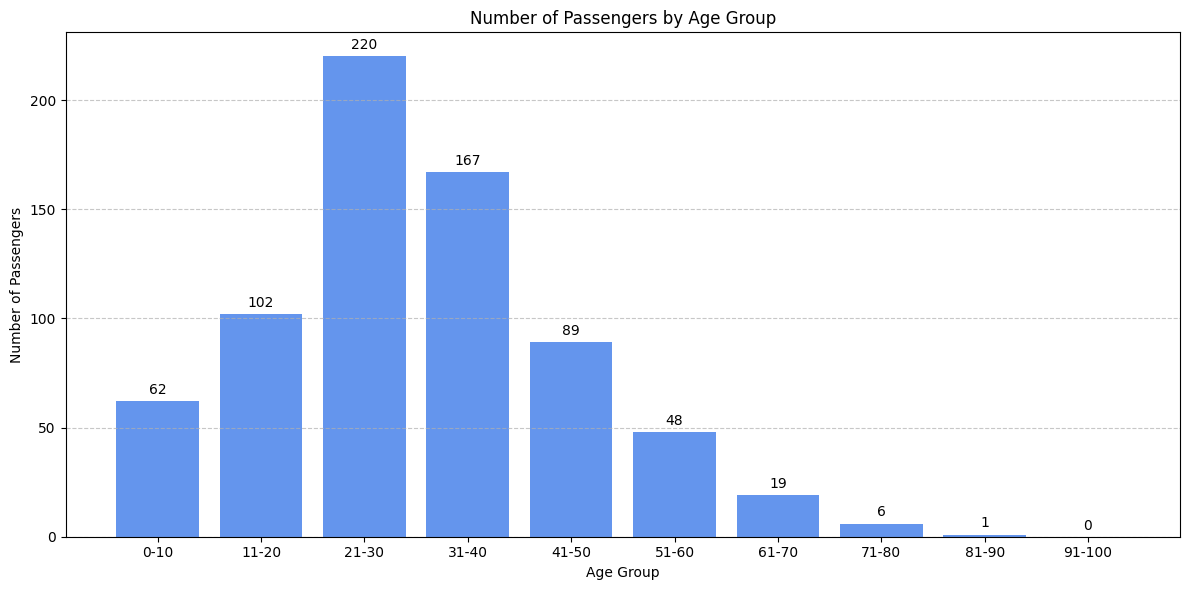

In [47]:
# For how many passengers do we have age information (including estimated age)?
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Create a new column 'age_group' with the corresponding age bins
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count the number of passengers in each age group
age_counts = df['age_group'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12, 6))

# Create a bar plot
bars = ax.bar(age_counts.index, age_counts.values, color='cornflowerblue')

# Add value annotations above the bars
def add_value_annotations(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_annotations(bars)

# Customize the plot
ax.set_title('Number of Passengers by Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Passengers')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# For how many is the age information missing? What is the age distribution for passengers whose age information is available?
